In [7]:
!pip install kaggle

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle competitions download -c dogs-vs-cats

 97% 791M/812M [00:10<00:00, 137MB/s]
100% 812M/812M [00:10<00:00, 82.9MB/s]


In [14]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [15]:
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r')as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [16]:
from zipfile import ZipFile
dataset='/content/train.zip'

with ZipFile(dataset, 'r')as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [17]:
import os
path,dir,files=next(os.walk('/content/train'))
file_count=len(files)
print("Number of images:",file_count)

Number of images: 25000


In [18]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.3780.jpg', 'cat.11677.jpg', 'dog.2159.jpg', 'dog.8164.jpg', 'cat.12279.jpg', 'cat.5685.jpg', 'cat.8308.jpg', 'cat.9393.jpg', 'dog.8578.jpg', 'dog.5932.jpg', 'cat.8116.jpg', 'cat.9274.jpg', 'cat.7201.jpg', 'dog.11332.jpg', 'cat.9587.jpg', 'cat.9961.jpg', 'cat.10154.jpg', 'dog.791.jpg', 'cat.7902.jpg', 'dog.5149.jpg', 'dog.7122.jpg', 'cat.12010.jpg', 'dog.8277.jpg', 'cat.11741.jpg', 'cat.12269.jpg', 'dog.824.jpg', 'cat.4458.jpg', 'dog.10441.jpg', 'cat.102.jpg', 'dog.11007.jpg', 'dog.1402.jpg', 'cat.2030.jpg', 'cat.5097.jpg', 'dog.5174.jpg', 'cat.8730.jpg', 'cat.3570.jpg', 'dog.4038.jpg', 'cat.7228.jpg', 'dog.9018.jpg', 'cat.5123.jpg', 'cat.1477.jpg', 'dog.7496.jpg', 'dog.8121.jpg', 'dog.11060.jpg', 'cat.2613.jpg', 'dog.9091.jpg', 'cat.6172.jpg', 'cat.7349.jpg', 'cat.11167.jpg', 'cat.2777.jpg', 'dog.8445.jpg', 'cat.1878.jpg', 'dog.8787.jpg', 'cat.7625.jpg', 'dog.8125.jpg', 'dog.9143.jpg', 'dog.311.jpg', 'dog.3393.jpg', 'cat.8334.jpg', 'cat.9267.jpg', 'dog.7003.jpg', 'dog.4082.jpg', 

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,models,layers
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow

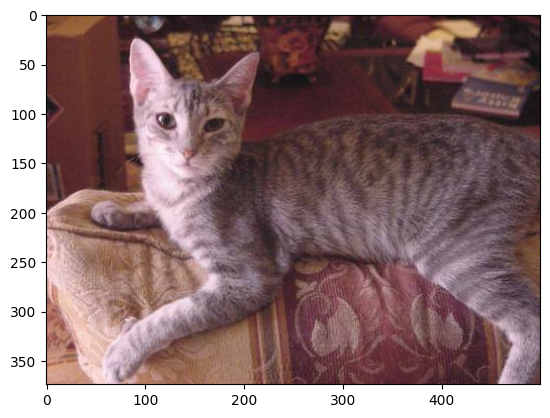

In [22]:
img=mpimg.imread('/content/train/cat.5685.jpg')
imgplot=plt.imshow(img)
plt.show()

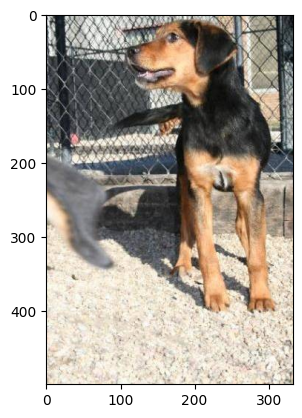

In [23]:
img=mpimg.imread('/content/train/dog.8164.jpg')
imgplot=plt.imshow(img)
plt.show()

In [25]:
file_names=os.listdir('/content/train')
for i in range(5):
  name=file_names[i]
  print(name[0:3])

cat
cat
dog
dog
cat


In [27]:
file_names=os.listdir('/content/train')
dog_count=0
cat_count=0
for img_file in file_names:
  name=img_file[0:3]
  if(name=='dog'):
    dog_count+=1
  else:
    cat_count+=1
print("Number of dog images:",dog_count)
print("Number of cat images:",cat_count)

Number of dog images: 12500
Number of cat images: 12500


In [28]:
os.mkdir('/content/image resized')

In [33]:
original_folder='/content/train/'
resized_folder='/content/image resized/'
for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')

  newImgPath=resized_folder+filename
  img.save(newImgPath)

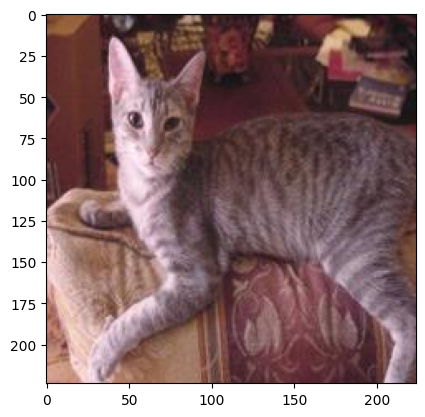

In [38]:
#display resized cat image
img=mpimg.imread('/content/image resized/cat.5685.jpg')
imgplot=plt.imshow(img)
plt.show()

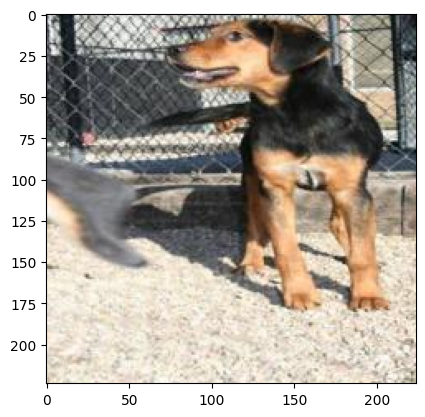

In [39]:
img=mpimg.imread('/content/image resized/dog.8164.jpg')
imgplot=plt.imshow(img)
plt.show()

In [40]:
filenames=os.listdir('/content/image resized/')
labels=[]
for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]
  if(label=='dog'):
    labels.append(1)
  else:
    labels.append(0)

In [44]:
filenames[0:5]

['cat.3780.jpg',
 'cat.11677.jpg',
 'dog.2159.jpg',
 'dog.8164.jpg',
 'cat.12279.jpg']

In [43]:
print(labels[0:5])

[0, 0, 1, 1, 0]


In [46]:
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 994 1006]


Converting resized images to numpy arrays

In [47]:
import cv2
import glob

In [50]:
image_directory='/content/image resized/'
image_extension=['png','jpg']

files=[]

[files.extend(glob.glob(image_directory+'*.'+e))for e in image_extension]

dog_cat_images=np.asarray([cv2.imread(file)for file in files])

In [51]:
print(dog_cat_images)

[[[[ 41  92 108]
   [ 42  93 109]
   [ 55 107 120]
   ...
   [ 31  46  62]
   [ 26  33  50]
   [ 41  46  61]]

  [[ 51 102 118]
   [ 49 100 116]
   [ 57 108 124]
   ...
   [142 158 171]
   [140 149 162]
   [130 136 149]]

  [[ 50  98 116]
   [ 48  97 113]
   [ 53 104 120]
   ...
   [233 252 255]
   [241 254 255]
   [223 233 240]]

  ...

  [[ 26  40  58]
   [ 28  42  60]
   [ 30  45  61]
   ...
   [ 27  60 105]
   [ 17  56 108]
   [  7  48 103]]

  [[ 27  43  60]
   [ 29  45  62]
   [ 30  46  63]
   ...
   [ 26  59 104]
   [ 16  56 109]
   [  5  48 105]]

  [[ 23  39  56]
   [ 25  41  58]
   [ 27  43  60]
   ...
   [ 26  59 104]
   [ 16  56 109]
   [  5  48 105]]]


 [[[ 25  27  28]
   [ 31  33  34]
   [ 41  43  44]
   ...
   [145 159 195]
   [153 158 191]
   [ 87  89 120]]

  [[  6   8   9]
   [  4   6   7]
   [  7   9  10]
   ...
   [152 163 195]
   [148 150 180]
   [ 83  82 108]]

  [[ 24  23  25]
   [ 18  17  19]
   [ 17  16  18]
   ...
   [163 168 193]
   [142 140 160]
   [ 81  73

In [52]:
type(dog_cat_images)

numpy.ndarray

In [53]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [56]:
x=dog_cat_images
y=labels
x

array([[[[ 41,  92, 108],
         [ 42,  93, 109],
         [ 55, 107, 120],
         ...,
         [ 31,  46,  62],
         [ 26,  33,  50],
         [ 41,  46,  61]],

        [[ 51, 102, 118],
         [ 49, 100, 116],
         [ 57, 108, 124],
         ...,
         [142, 158, 171],
         [140, 149, 162],
         [130, 136, 149]],

        [[ 50,  98, 116],
         [ 48,  97, 113],
         [ 53, 104, 120],
         ...,
         [233, 252, 255],
         [241, 254, 255],
         [223, 233, 240]],

        ...,

        [[ 26,  40,  58],
         [ 28,  42,  60],
         [ 30,  45,  61],
         ...,
         [ 27,  60, 105],
         [ 17,  56, 108],
         [  7,  48, 103]],

        [[ 27,  43,  60],
         [ 29,  45,  62],
         [ 30,  46,  63],
         ...,
         [ 26,  59, 104],
         [ 16,  56, 109],
         [  5,  48, 105]],

        [[ 23,  39,  56],
         [ 25,  41,  58],
         [ 27,  43,  60],
         ...,
         [ 26,  59, 104],
        

In [60]:
y=np.asarray(labels)

In [62]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [65]:
x_train.shape,x_test.shape,x.shape

((1600, 224, 224, 3), (400, 224, 224, 3), (2000, 224, 224, 3))

In [66]:
x_train=x_train/255
x_test=x_test/255

In [67]:
x_train

array([[[[0.8       , 0.80784314, 0.81176471],
         [0.8       , 0.80784314, 0.81176471],
         [0.8       , 0.80784314, 0.81176471],
         ...,
         [0.82352941, 0.83137255, 0.83529412],
         [0.82352941, 0.83137255, 0.83529412],
         [0.82352941, 0.83137255, 0.83529412]],

        [[0.8       , 0.80784314, 0.81176471],
         [0.8       , 0.80784314, 0.81176471],
         [0.8       , 0.80784314, 0.81176471],
         ...,
         [0.82352941, 0.83137255, 0.83529412],
         [0.82352941, 0.83137255, 0.83529412],
         [0.82352941, 0.83137255, 0.83529412]],

        [[0.8       , 0.80784314, 0.81176471],
         [0.8       , 0.80784314, 0.81176471],
         [0.8       , 0.80784314, 0.81176471],
         ...,
         [0.82352941, 0.83137255, 0.83529412],
         [0.82352941, 0.83137255, 0.83529412],
         [0.82352941, 0.83137255, 0.83529412]],

        ...,

        [[0.78039216, 0.78039216, 0.78039216],
         [0.78039216, 0.78039216, 0.78039216]

In [68]:
import tensorflow_hub as hub

In [69]:
model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model=hub.KerasLayer(model,input_shape=(224,224,3),trainable=False)

In [70]:
model=keras.Sequential([
          pretrained_model,
          keras.layers.Dense(2)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [71]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [72]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 14s 40ms/step - loss: 0.7288 - accuracy: 0.8544
Epoch 2/5
50/50 [==============================] - 2s 43ms/step - loss: 0.5571 - accuracy: 0.9588
Epoch 3/5
50/50 [==============================] - 2s 39ms/step - loss: 0.5671 - accuracy: 0.9588
Epoch 4/5
50/50 [==============================] - 2s 39ms/step - loss: 0.5662 - accuracy: 0.9588
Epoch 5/5
50/50 [==============================] - 2s 39ms/step - loss: 0.5662 - accuracy: 0.9588


In [73]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 2s 89ms/step - loss: 0.5545 - accuracy: 0.9600


[0.5545236468315125, 0.9599999785423279]

In [74]:
y_pred=model.predict(x_test)
y_pred

13/13 [==============================] - 1s 40ms/step


array([[-3.35773921e+00, -4.02561331e+00],
       [-3.20119786e+00, -3.00409734e-01],
       [-4.62201953e-01, -3.22967005e+00],
       [ 6.10305250e-01, -4.38287878e+00],
       [-1.30822673e-01, -4.02797127e+00],
       [-3.27130103e+00, -1.51201367e+00],
       [ 4.76624250e-01, -3.82561612e+00],
       [ 3.29314172e-01, -4.16059351e+00],
       [-4.32076693e+00, -7.06600249e-01],
       [-2.28365707e+00, -1.40815651e+00],
       [-7.55233228e-01, -5.15661860e+00],
       [-1.19126320e+00, -2.01845407e+00],
       [-3.51860452e+00, -1.27449369e+00],
       [-2.25739509e-01, -4.62556124e+00],
       [-2.06651759e+00, -3.66351414e+00],
       [-6.56901062e-01, -4.88433123e+00],
       [-3.13754582e+00, -5.59862703e-02],
       [-8.45453501e-01, -3.36537695e+00],
       [-1.06907153e+00, -4.74974394e+00],
       [-1.43303871e+00, -4.44456911e+00],
       [-1.90499473e+00, -3.55889726e+00],
       [-6.65763259e-01, -4.28914833e+00],
       [-4.58601141e+00, -2.24996519e+00],
       [-1.

In [76]:
y_pred_labels=[np.argmax(i)for i in y_pred]
y_pred_labels[0:5]

[0, 1, 0, 0, 0]

In [77]:
y_test[0:5]

array([0, 1, 0, 0, 0])

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_pred_labels,y_test)

0.96

Path of the image to be predicted/content/dog1.jpg


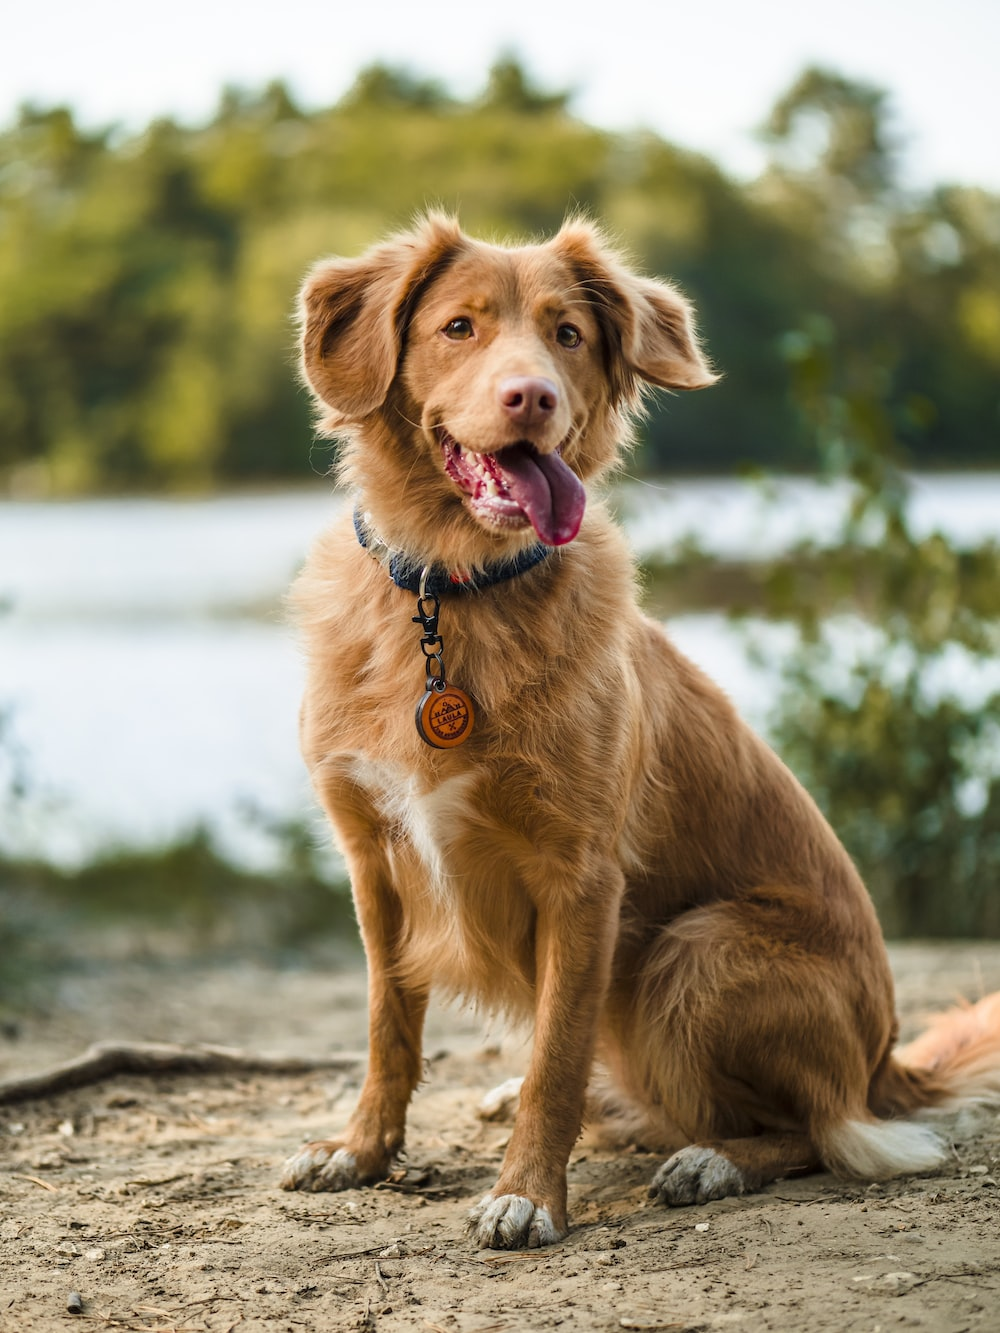

1/1 [==============================] - 0s 34ms/step
[[-2.9279275   0.37914503]]
The image represents a Dog


In [90]:
input_image_path=input('Path of the image to be predicted')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
resized=cv2.resize(input_image,(224,224))
scaled=resized/255
reshaped=np.reshape(scaled,[1,224,224,3])
prediction=model.predict(reshaped)

print(prediction)
pred_label=np.argmax(prediction)

if(pred_label==0):
  print("The image represents a Cat")
else:
  print("The image represents a Dog")

Path of the image to be predicted/content/cat.jpg


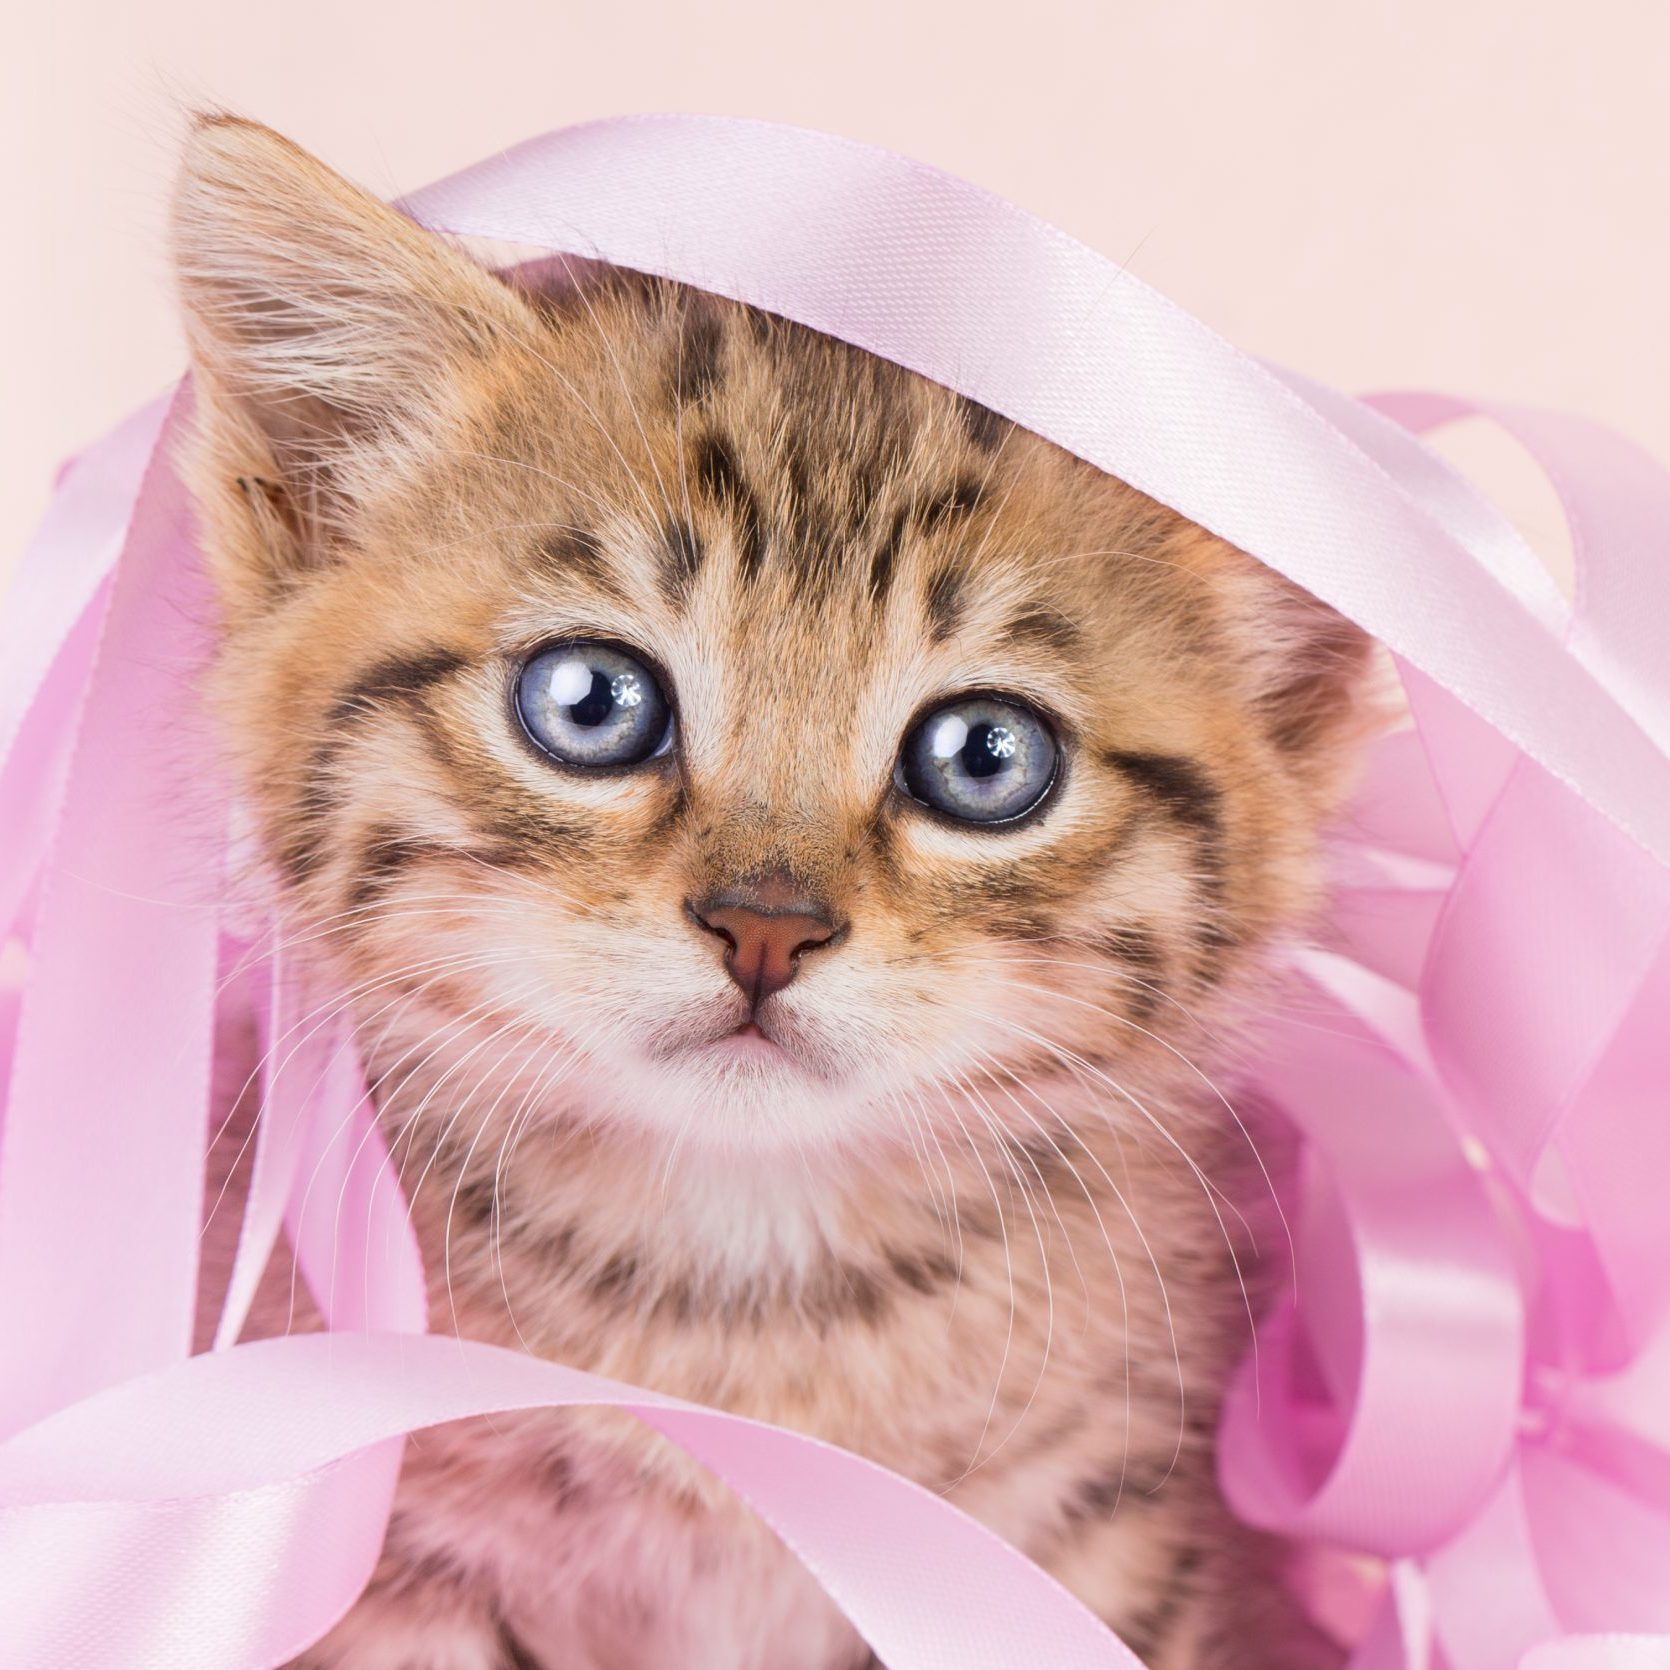

1/1 [==============================] - 0s 35ms/step
[[-1.0382347 -4.2372093]]
The image represents a Cat


In [91]:
input_image_path=input('Path of the image to be predicted')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
resized=cv2.resize(input_image,(224,224))
scaled=resized/255
reshaped=np.reshape(scaled,[1,224,224,3])
prediction=model.predict(reshaped)

print(prediction)
pred_label=np.argmax(prediction)

if(pred_label==0):
  print("The image represents a Cat")
else:
  print("The image represents a Dog")